### ***PREDICTING STUDENTS PERSONALIZED LEARNING***

## *DESCRIPTION:*
           

*   This dataset contains information on 10,000 students enrolled in various online courses. It includes demographic details (age, gender, education level), course-related activity (time spent on videos, quiz attempts/scores, forum participation), and outcomes like final exam scores and dropout likelihood. Additional features include engagement level, learning style, and feedback score. The data can be used to analyze learning behavior, predict performance, and personalize educational experiences.
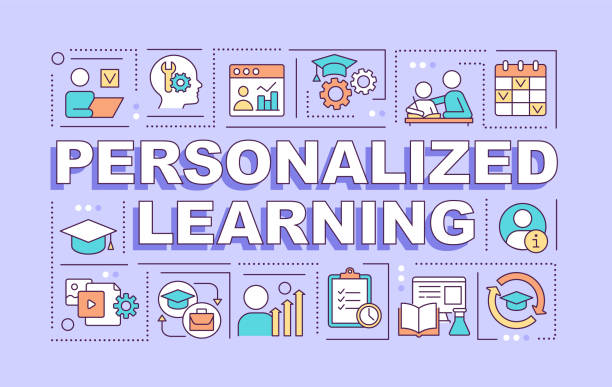


In [48]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import skew
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.feature_selection import SelectKBest, f_classif

***LOADING CSV FILE***

In [2]:
data=pd.read_csv('personalized_learning_dataset.csv')

In [3]:
df=pd.DataFrame(data)

In [4]:
df.head()

,Student_ID,Age,Gender,Education_Level,Course_Name,Time_Spent_on_Videos,Quiz_Attempts,Quiz_Scores,Forum_Participation,Assignment_Completion_Rate,Engagement_Level,Final_Exam_Score,Learning_Style,Feedback_Score,Dropout_Likelihood
0,S00001,15,Female,High School,Machine Learning,171,4,67,2,89,Medium,51,Visual,1,No
1,S00002,49,Male,Undergraduate,Python Basics,156,4,64,0,94,Medium,92,Reading/Writing,5,No
2,S00003,20,Female,Undergraduate,Python Basics,217,2,55,2,67,Medium,45,Reading/Writing,1,No
3,S00004,37,Female,Undergraduate,Data Science,489,1,65,43,60,High,59,Visual,4,No
4,S00005,34,Female,Postgraduate,Python Basics,496,3,59,34,88,Medium,93,Visual,3,No


In [5]:
print(df.tail())

     Student_ID  Age  Gender Education_Level       Course_Name  \
9995     S09996   26  Female   Undergraduate  Machine Learning   
9996     S09997   37    Male    Postgraduate  Machine Learning   
9997     S09998   40  Female    Postgraduate  Machine Learning   
9998     S09999   44    Male     High School     Python Basics   
9999     S10000   39  Female   Undergraduate  Machine Learning   

      Time_Spent_on_Videos  Quiz_Attempts  Quiz_Scores  Forum_Participation  \
9995                   162              2           87                   27   
9996                   447              2           39                   10   
9997                   105              4           50                   23   
9998                   245              2           84                   39   
9999                   171              2           88                    8   

      Assignment_Completion_Rate Engagement_Level  Final_Exam_Score  \
9995                          73           Medium        

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Student_ID                  10000 non-null  object
 1   Age                         10000 non-null  int64 
 2   Gender                      10000 non-null  object
 3   Education_Level             10000 non-null  object
 4   Course_Name                 10000 non-null  object
 5   Time_Spent_on_Videos        10000 non-null  int64 
 6   Quiz_Attempts               10000 non-null  int64 
 7   Quiz_Scores                 10000 non-null  int64 
 8   Forum_Participation         10000 non-null  int64 
 9   Assignment_Completion_Rate  10000 non-null  int64 
 10  Engagement_Level            10000 non-null  object
 11  Final_Exam_Score            10000 non-null  int64 
 12  Learning_Style              10000 non-null  object
 13  Feedback_Score              10000 non-null  int

In [7]:
df.columns

Index(['Student_ID', 'Age', 'Gender', 'Education_Level', 'Course_Name',
       'Time_Spent_on_Videos', 'Quiz_Attempts', 'Quiz_Scores',
       'Forum_Participation', 'Assignment_Completion_Rate', 'Engagement_Level',
       'Final_Exam_Score', 'Learning_Style', 'Feedback_Score',
       'Dropout_Likelihood'],
      dtype='object')

In [8]:
df.shape

(10000, 15)

In [9]:
df.describe()

,Age,Time_Spent_on_Videos,Quiz_Attempts,Quiz_Scores,Forum_Participation,Assignment_Completion_Rate,Final_Exam_Score,Feedback_Score
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,32.137700,255.375400,2.500500,64.578600,24.616200,69.546800,64.697000,3.012600
std,10.062647,141.656392,1.122642,20.289125,14.330305,17.360782,20.096417,1.421423
min,15.000000,10.000000,1.000000,30.000000,0.000000,40.000000,30.000000,1.000000
25%,24.000000,131.000000,1.000000,47.000000,12.000000,54.000000,47.000000,2.000000
50%,32.000000,257.000000,3.000000,65.000000,25.000000,69.000000,65.000000,3.000000
75%,41.000000,378.000000,4.000000,82.000000,37.000000,85.000000,82.000000,4.000000
max,49.000000,499.000000,4.000000,99.000000,49.000000,99.000000,99.000000,5.000000


***MISSING VALUES***


In [10]:
df.isnull().sum()

,0
Student_ID,0
Age,0
Gender,0
Education_Level,0
Course_Name,0
Time_Spent_on_Videos,0
Quiz_Attempts,0
Quiz_Scores,0
Forum_Participation,0
Assignment_Completion_Rate,0


***DUPLICATE VALUES***

In [11]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
9995,False
9996,False
9997,False
9998,False


In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
y=df['Dropout_Likelihood']
y

,Dropout_Likelihood
0,No
1,No
2,No
3,No
4,No
...,...
9995,No
9996,Yes
9997,No
9998,No


In [14]:
x=df.drop('Dropout_Likelihood',axis=1)

In [15]:
x.columns

Index(['Student_ID', 'Age', 'Gender', 'Education_Level', 'Course_Name',
       'Time_Spent_on_Videos', 'Quiz_Attempts', 'Quiz_Scores',
       'Forum_Participation', 'Assignment_Completion_Rate', 'Engagement_Level',
       'Final_Exam_Score', 'Learning_Style', 'Feedback_Score'],
      dtype='object')

***ENCODING***






In [18]:
le = LabelEncoder()
y=le.fit_transform(y)

In [19]:
oh=OneHotEncoder()
df_pandas_encoded=pd.get_dummies(df,columns=['Course_Name','Learning_Style','Gender','Education_Level','Engagement_Level'],drop_first=True)
encoder=OneHotEncoder(sparse_output=False)
categorical_columns=df.select_dtypes(include=['object']).columns.tolist()
encoder=OneHotEncoder(sparse_output=False,handle_unknown='ignore')
One_Hot_Encoded_Data=encoder.fit_transform(df[categorical_columns])
One_Hot_Encoder=encoder.fit_transform(df[categorical_columns])
One_Hot_df=pd.DataFrame(One_Hot_Encoder,columns=encoder.get_feature_names_out(categorical_columns))
df_sklearn_encoded=pd.concat([df.drop(categorical_columns,axis=1),One_Hot_df],axis=1)
print(f"One_Hot Encoded Data using scikit:\n{df_pandas_encoded.head()}")

One_Hot Encoded Data using scikit:
  Student_ID  Age  Time_Spent_on_Videos  Quiz_Attempts  Quiz_Scores  \
0     S00001   15                   171              4           67   
1     S00002   49                   156              4           64   
2     S00003   20                   217              2           55   
3     S00004   37                   489              1           65   
4     S00005   34                   496              3           59   

   Forum_Participation  Assignment_Completion_Rate  Final_Exam_Score  \
0                    2                          89                51   
1                    0                          94                92   
2                    2                          67                45   
3                   43                          60                59   
4                   34                          88                93   

   Feedback_Score Dropout_Likelihood  ...  Course_Name_Web Development  \
0               1              






*   using one-hot encoding to convert text columns into numbers so the machine learning model can understand them. You tried it two ways: using Pandas (get_dummies) for quick encoding and Scikit-learn (OneHotEncoder) for more control and integration with ML workflows.







In [20]:
df1=df_sklearn_encoded

In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 10028 entries, Age to Dropout_Likelihood_Yes
dtypes: float64(10020), int64(8)
memory usage: 765.1 MB


In [22]:
df1.columns

Index(['Age', 'Time_Spent_on_Videos', 'Quiz_Attempts', 'Quiz_Scores',
       'Forum_Participation', 'Assignment_Completion_Rate', 'Final_Exam_Score',
       'Feedback_Score', 'Student_ID_S00001', 'Student_ID_S00002',
       ...
       'Course_Name_Web Development', 'Engagement_Level_High',
       'Engagement_Level_Low', 'Engagement_Level_Medium',
       'Learning_Style_Auditory', 'Learning_Style_Kinesthetic',
       'Learning_Style_Reading/Writing', 'Learning_Style_Visual',
       'Dropout_Likelihood_No', 'Dropout_Likelihood_Yes'],
      dtype='object', length=10028)

***OUTLIERS***





In [23]:
df_cleaned = df.drop(columns=["Student_ID"])

In [24]:
columns = df_cleaned.select_dtypes(include=["int64", "float64"]).columns.tolist()
df_num = df_cleaned[columns]
df_num.describe()

,Age,Time_Spent_on_Videos,Quiz_Attempts,Quiz_Scores,Forum_Participation,Assignment_Completion_Rate,Final_Exam_Score,Feedback_Score
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,32.137700,255.375400,2.500500,64.578600,24.616200,69.546800,64.697000,3.012600
std,10.062647,141.656392,1.122642,20.289125,14.330305,17.360782,20.096417,1.421423
min,15.000000,10.000000,1.000000,30.000000,0.000000,40.000000,30.000000,1.000000
25%,24.000000,131.000000,1.000000,47.000000,12.000000,54.000000,47.000000,2.000000
50%,32.000000,257.000000,3.000000,65.000000,25.000000,69.000000,65.000000,3.000000
75%,41.000000,378.000000,4.000000,82.000000,37.000000,85.000000,82.000000,4.000000
max,49.000000,499.000000,4.000000,99.000000,49.000000,99.000000,99.000000,5.000000


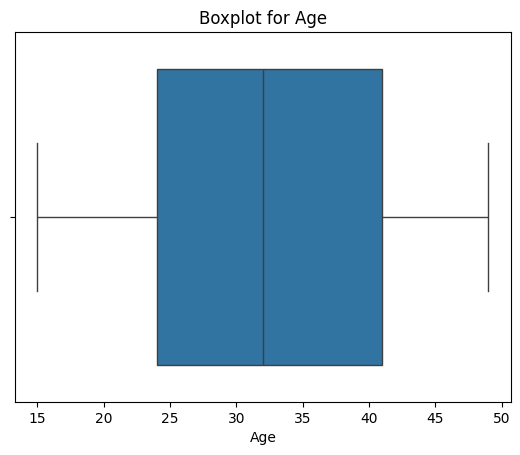

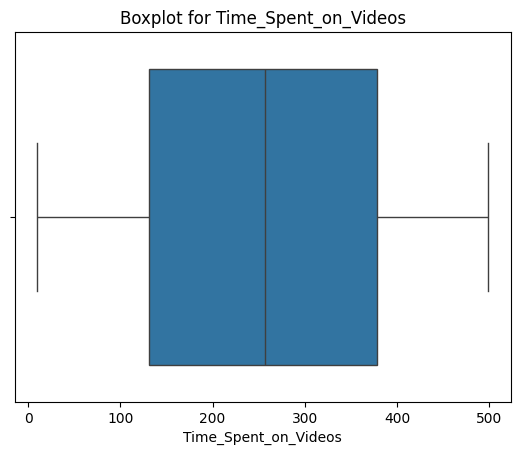

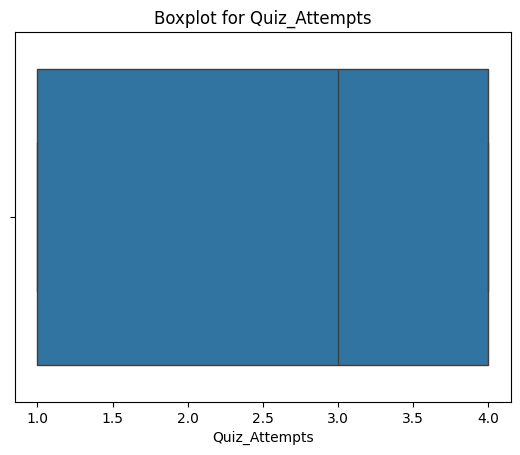

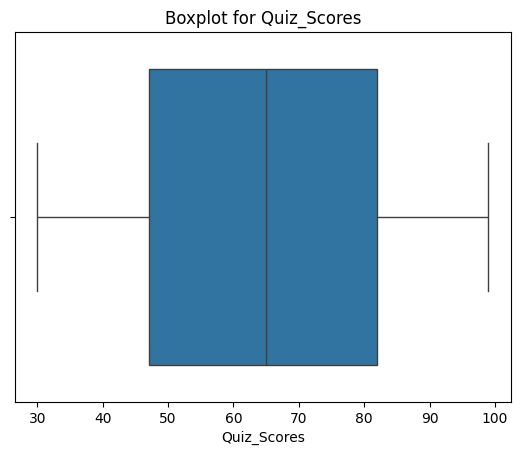

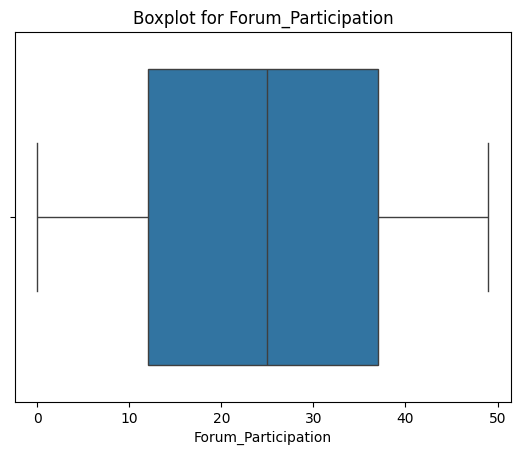

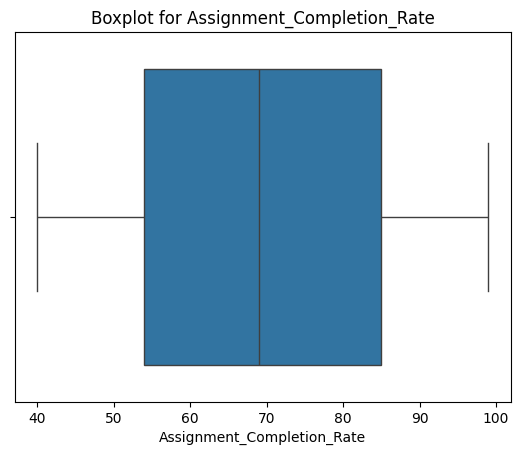

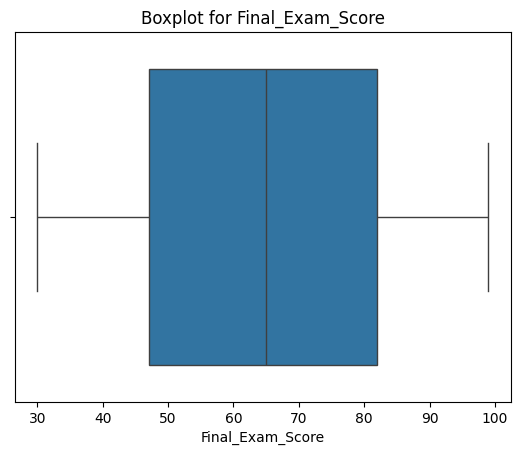

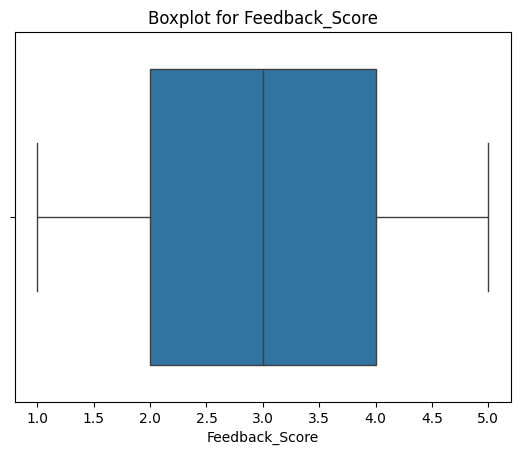

<Axes: >

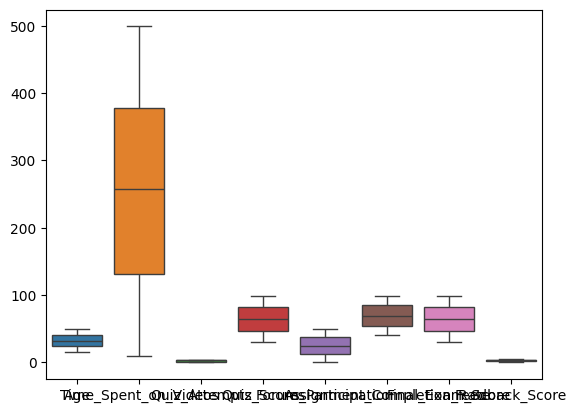

In [25]:
for col in columns:
    sns.boxplot(x=df_cleaned[col])
    plt.title(f"Boxplot for {col}")
    plt.show()
def handling_outliers(df):
  for col in df.select_dtypes(include=["int64", "float64"]).columns.tolist():
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    iqr=Q3-Q1
    lower_bound=Q1-(1.5*iqr)
    upper_bound=Q3+(1.5*iqr)
    df[col]=df[col].apply(lambda x:lower_bound if x<lower_bound else upper_bound if x>upper_bound else x)
  return df
df1=handling_outliers(df)
df1.head()
sns.boxplot(df1)




*   fixing outliers by capping extreme values using the IQR method. Then checking the cleaned data with boxplots to make sure everything looks better.



In [26]:
df1.skew

<bound method DataFrame.skew of      Student_ID  Age  Gender Education_Level       Course_Name  \
0        S00001   15  Female     High School  Machine Learning   
1        S00002   49    Male   Undergraduate     Python Basics   
2        S00003   20  Female   Undergraduate     Python Basics   
3        S00004   37  Female   Undergraduate      Data Science   
4        S00005   34  Female    Postgraduate     Python Basics   
...         ...  ...     ...             ...               ...   
9995     S09996   26  Female   Undergraduate  Machine Learning   
9996     S09997   37    Male    Postgraduate  Machine Learning   
9997     S09998   40  Female    Postgraduate  Machine Learning   
9998     S09999   44    Male     High School     Python Basics   
9999     S10000   39  Female   Undergraduate  Machine Learning   

      Time_Spent_on_Videos  Quiz_Attempts  Quiz_Scores  Forum_Participation  \
0                      171              4           67                    2   
1                      156              4           64                    0   
2                      217              2           55                    2   
3                      489              1           65                   43   
4                      496              3           59                   34   
...                    ...            ...          ...                  ...   
9995                   162              2           87                   27   
9996                   447              2           39                   10   
9997                   105              4           50                   23   
9998                   245              2           84                   39   
9999                   171              2           88                    8   

      Assignment_Completion_Rate Engagement_Level  Final_Exam_Score  \
0                             89           Medium                51   
1                             94           Medium                92   
2                             67           Medium                45   
3                             60             High                59   
4                             88           Medium                93   
...                          ...              ...               ...   
9995                          73           Medium                68   
9996                          68           Medium                46   
9997                          41             High                64   
9998                          85           Medium                38   
9999                          69           Medium                97   

       Learning_Style  Feedback_Score Dropout_Likelihood  
0              Visual               1                 No  
1     Reading/Writing               5                 No  
2     Reading/Writing               1                 No  
3              Visual               4                 No  
4              Visual               3                 No  
...               ...             ...                ...  
9995      Kinesthetic               2                 No  
9996  Reading/Writing               1                Yes  
9997           Visual               1                 No  
9998           Visual               2                 No  
9999           Visual               2                 No  

[10000 rows x 15 columns]>

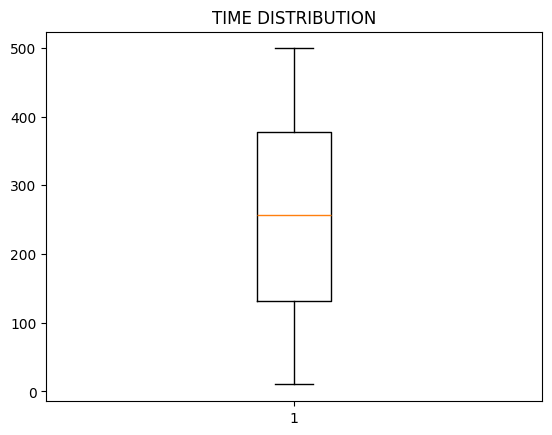

In [27]:
a=df['Time_Spent_on_Videos']
plt.boxplot(a)
plt.title('TIME DISTRIBUTION')
plt.show()

***VISUALIZATION***



*  Visualization means turning numbers into
pictures (like charts and graphs) so you can see patterns, trends, or problems in your data — way easier than reading through rows and columns




1.   ***LINE CHART***




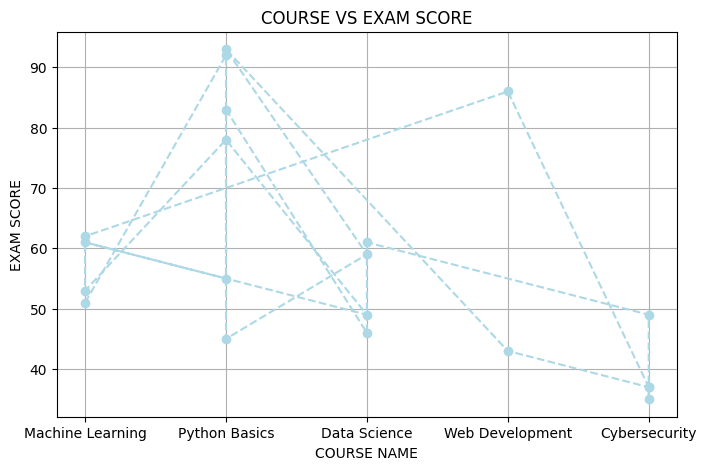

In [28]:
x=df['Course_Name'].head(20)
y=df['Final_Exam_Score'].head(20)
plt.figure(figsize=(8,5))
plt.title('COURSE VS EXAM SCORE')
plt.xlabel('COURSE NAME')
plt.ylabel('EXAM SCORE')
plt.plot(x,y,color='Lightblue',marker='o',linestyle='--')
plt.grid(True)
plt.show()

   2. ***BAR CHART***



<ipython-input-29-802b9e5d01ed>:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


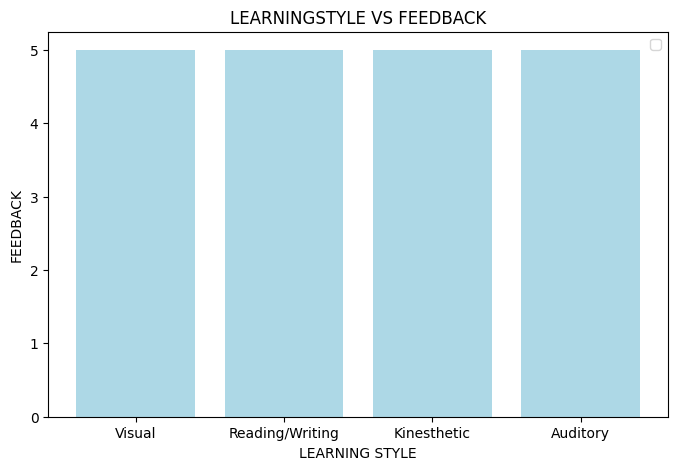

In [29]:
x=df['Learning_Style']
y=df['Feedback_Score']
plt.figure(figsize=(8,5))
plt.bar(x,y,color='Lightblue')
plt.title('LEARNINGSTYLE VS FEEDBACK')
plt.xlabel('LEARNING STYLE')
plt.ylabel('FEEDBACK')
plt.legend()
plt.show()

3. ***HISTOGRAM***

<function matplotlib.pyplot.show(close=None, block=None)>

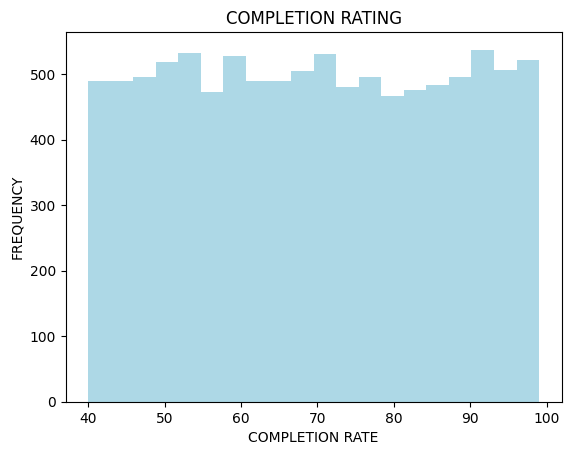

In [30]:
x=df['Assignment_Completion_Rate']
plt.hist(x,bins=20,color='Lightblue')
plt.title('COMPLETION RATING')
plt.xlabel('COMPLETION RATE')
plt.ylabel('FREQUENCY')
plt.show

4.***HEATMAP***

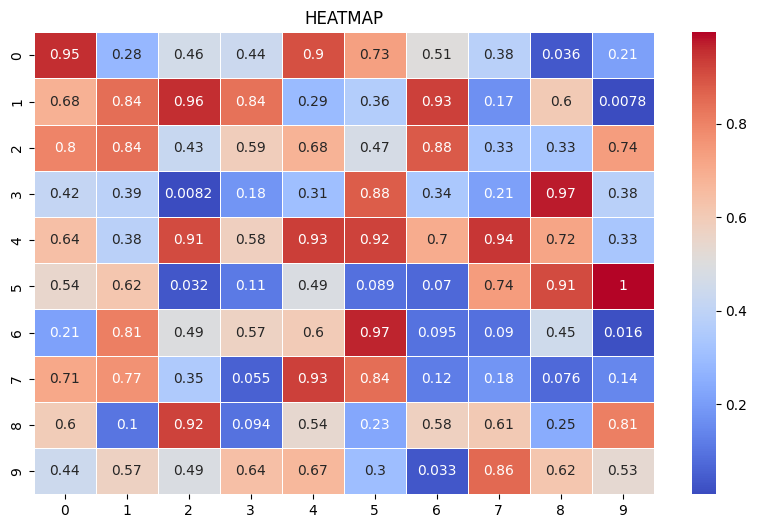

In [31]:
data=np.random.rand(10,10)
plt.figure(figsize=(10,6))
sns.heatmap(data,annot=True,cmap='coolwarm',linewidth=0.5)
plt.title('HEATMAP')
plt.show()

5. ***SCATTERPLOT***

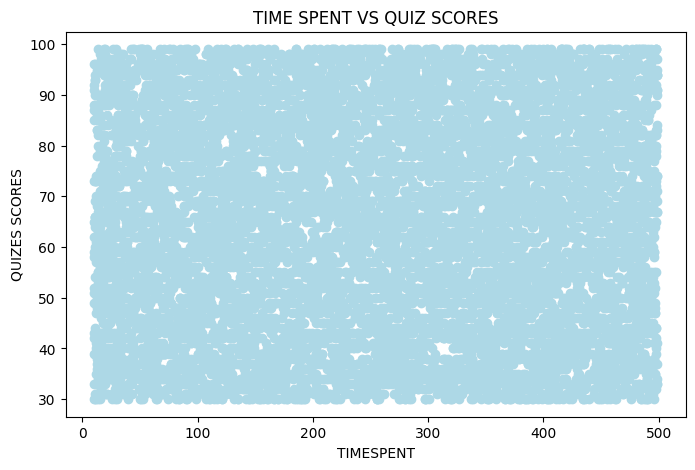

In [32]:
x=df['Time_Spent_on_Videos']
y=df['Quiz_Scores']
plt.figure(figsize=(8,5))
plt.scatter(x,y,color='Lightblue',marker='o')
plt.title('TIME SPENT VS QUIZ SCORES')
plt.xlabel('TIMESPENT')
plt.ylabel('QUIZES SCORES')
plt.show()

6. ***KDEPLOT***

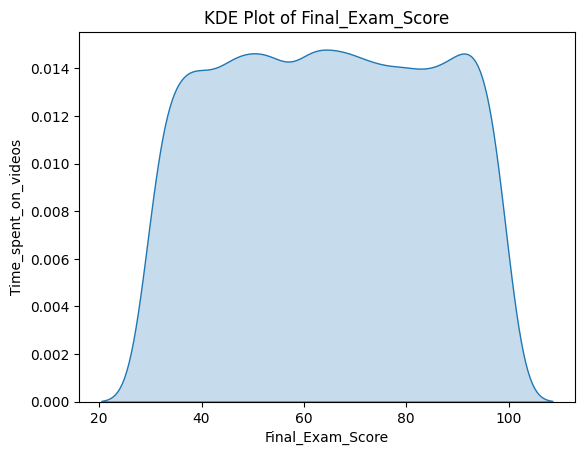

In [37]:
sns.kdeplot(data=df, x='Final_Exam_Score', fill=True)
plt.title('KDE Plot of Final_Exam_Score')
plt.xlabel('Final_Exam_Score')
plt.ylabel('Time_spent_on_videos')
plt.show()


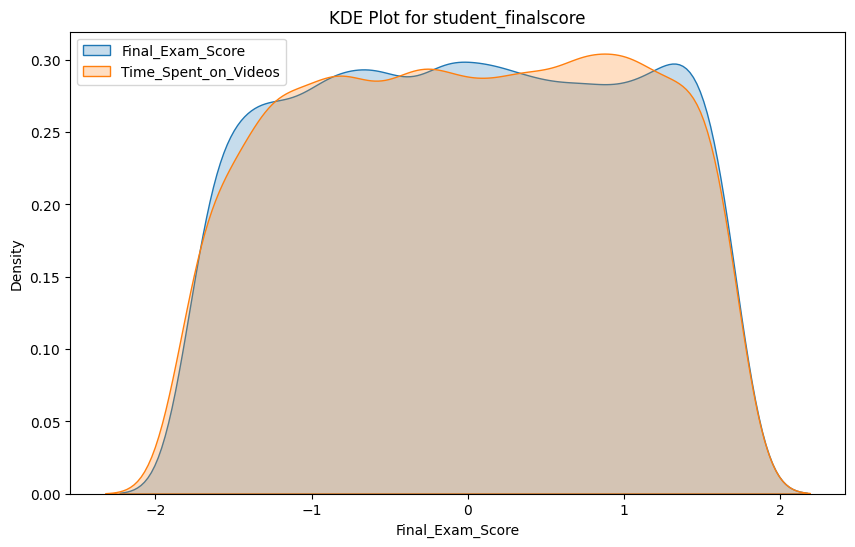

Age Skewness: -0.0230
Time_Spent_on_Videos Skewness: -0.0481
Quiz_Attempts Skewness: -0.0074
Quiz_Scores Skewness: -0.0090
Forum_Participation Skewness: -0.0141
Assignment_Completion_Rate Skewness: 0.0139
Final_Exam_Score Skewness: -0.0205
Feedback_Score Skewness: -0.0090


In [49]:
cols_to_transform = ['Final_Exam_Score', 'Time_Spent_on_Videos']
pt = PowerTransformer(method='yeo-johnson')
col_indices = [df.columns.get_loc(col) for col in cols_to_transform]
data_to_transform = df[cols_to_transform].to_numpy()
transformed_data = pt.fit_transform(data_to_transform)
df.loc[:, cols_to_transform] = transformed_data
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Final_Exam_Score', fill=True, label="Final_Exam_Score")
sns.kdeplot(data=df, x='Time_Spent_on_Videos', fill=True, label="Time_Spent_on_Videos")
plt.legend()
plt.title("KDE Plot for student_finalscore")
plt.show()
for col in df.select_dtypes(include=['number']).columns:
    print(f"{col} Skewness: {skew(df[col]):.4f}")

***FEATURES SELECTION***


*   Feature selection means picking the most useful columns from your dataset that actually help the model make good predictions.



In [34]:
from sklearn.feature_selection import SelectKBest, f_classif

In [35]:
x = df.select_dtypes(include=['number'])
if 'unnamed:0' in x.columns:
    x = x.drop(columns='unnamed:0', axis=1)
y = df['Dropout_Likelihood']
selecter = SelectKBest(score_func=f_classif, k=14)
x_new = selecter.fit_transform(x, y)
selected_features_num = x.columns[selecter.get_support()]
features_score = pd.DataFrame({'Features': selected_features_num, 'Scores': selecter.scores_[selecter.get_support()]})
features_score = features_score.sort_values(by='Scores', ascending=False)
print(features_score)

                     Features    Scores
3                 Quiz_Scores  2.140762
4         Forum_Participation  1.896424
0                         Age  1.540425
5  Assignment_Completion_Rate  1.012580
1        Time_Spent_on_Videos  0.429048
6            Final_Exam_Score  0.188277
7              Feedback_Score  0.156944
2               Quiz_Attempts  0.079028


/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:783: UserWarning: k=14 is greater than n_features=8. All the features will be returned.
  warnings.warn(


***TRAIN AND TEST SPLIT***


*  When we build a machine learning model, we teach it using part of the data (that’s called the training set) and then test it to see how well it learned (using the testing set).



In [36]:
x_selected=x[selected_features_num]
x_selected.columns
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_selected,y,test_size=0.20,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 8)
(2000, 8)
(8000,)
(2000,)


***SCALING***


*   Scaling means making all your number values fit into the same range — like putting them all on the same scale, so they’re easier to compare.



In [ ]:
from sklearn.preprocessing import StandardScaler
Ss=StandardScaler()
x_test_scaled=Ss.fit_transform(x_test)
x_train_scaled=Ss.fit_transform(x_train)

***MODEL BULIDING***


*   Model building is like teaching a computer how to make predictions using your data.You give it examples, and it learns the patterns — kind of like teaching a kid how to solve math problems by giving them practice questions.



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,classification_report,confusion_matrix

In [ ]:
classifiers={
    'Logistic Regression':LogisticRegression(),
    'Decision Tree Classifier':DecisionTreeClassifier(),
    'SVC':SVC(),
    'Random Forest Classifier':RandomForestClassifier()
}
for name,clf in classifiers.items():
  clf.fit(x_train_scaled,y_train)
  y_pred=clf.predict(x_test_scaled)
  print(f"\n {name} results:")
  print("accuracy:",accuracy_score(y_test,y_pred))
  print("confusion matrix:\n")
  print(confusion_matrix(y_test,y_pred))
  print("classification report:\n")
  print(classification_report(y_test,y_pred))

In [ ]:
print("The Best Model is : Logistic Regression ")